<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Natural Language Processing (NLP)
## *Data Science Unit 4 Sprint 1 Assignment 1*

Your goal in this assignment: find the attributes of the best & worst coffee shops in the dataset. The text is fairly raw: dates in the review, extra words in the `star_rating` column, etc. You'll probably want to clean that stuff up for a better analysis. 

Analyze the corpus of text using text visualizations of token frequency. Try cleaning the data as much as possible. Try the following techniques: 
- Lemmatization
- Custom stopword removal

Keep in mind the attributes of good tokens. Once you have a solid baseline, layer in the star rating in your visualization(s). Key part of this assignment - produce a write-up of the attributes of the best and worst coffee shops. Based on your analysis, what makes the best the best and the worst the worst. Use graphs and numbesr from your analysis to support your conclusions. There should be plenty of markdown cells! :coffee:

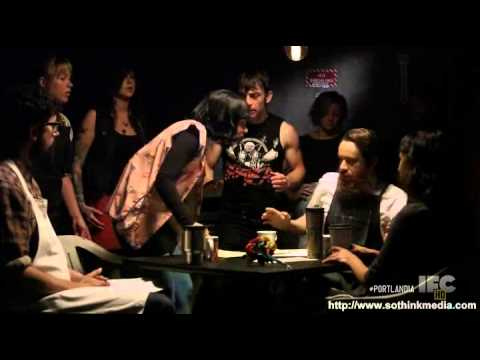

In [1]:
from IPython.display import YouTubeVideo

YouTubeVideo('Jml7NVYm8cs')

In [1]:
%pwd

'/Users/timothy/Documents/GitHub/DS-Unit-4-Sprint-1-NLP'

In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/LambdaSchool/DS-Unit-4-Sprint-1-NLP/master/module1-text-data/data/yelp_coffeeshop_review_data.csv"

shops = pd.read_csv(url)
shops.head()

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating


In [2]:
shops['star_rating'].head()

0     5.0 star rating 
1     4.0 star rating 
2     4.0 star rating 
3     2.0 star rating 
4     4.0 star rating 
Name: star_rating, dtype: object

In [3]:
def convert_star_rating_to_number(theData):
    return float(theData.strip(" star rating"))

In [4]:
shops['star_rating'] = shops['star_rating'].apply(convert_star_rating_to_number)

In [5]:
shops.head()

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0


In [8]:
shopsBad = shops[shops['star_rating'] <= 3.0]
shopsGood = shops[shops['star_rating'] >= 4.0]

In [9]:
shopsBad.head()

,coffee_shop_name,full_review_text,star_rating
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0
8,The Factory - Cafe With a Soul,"10/25/2016 1 check-in Ok, let's try this appr...",3.0
11,The Factory - Cafe With a Soul,"11/20/2016 The store has A+ decoration, but h...",3.0
12,The Factory - Cafe With a Soul,11/17/2016 1 check-in Listed in 2016 - The Th...,3.0
25,The Factory - Cafe With a Soul,"12/2/2016 Okay, so after visiting my friends ...",1.0


In [10]:
shopsGood.head()

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0
5,The Factory - Cafe With a Soul,11/20/2016 1 check-in Very cute cafe! I think...,4.0


In [11]:
shopsBad.shape, shopsGood.shape

((1476, 3), (6140, 3))

In [8]:
shops['full_review_text'].head(10)

0     11/25/2016 1 check-in Love love loved the atm...
1     12/2/2016 Listed in Date Night: Austin, Ambia...
2     11/30/2016 1 check-in Listed in Brunch Spots ...
3     11/25/2016 Very cool decor! Good drinks Nice ...
4     12/3/2016 1 check-in They are located within ...
5     11/20/2016 1 check-in Very cute cafe! I think...
6     10/27/2016 2 check-ins Listed in "Nuptial Cof...
7     11/2/2016 2 check-ins Love this place!  5 sta...
8     10/25/2016 1 check-in Ok, let's try this appr...
9     11/10/2016 3 check-ins This place has been sh...
Name: full_review_text, dtype: object

In [6]:
"""
Import Statements
"""

# Base
from collections import Counter
import re
 
import pandas as pd

# Plotting
import squarify
import matplotlib.pyplot as plt
import seaborn as sns

# NLP Libraries
import spacy
from spacy.tokenizer import Tokenizer
from nltk.stem import PorterStemmer

nlp = spacy.load("en_core_web_lg")

In [7]:
tokenizer = Tokenizer(nlp.vocab)

## How do we want to analyze these coffee shop tokens? 

- Overall Word / Token Count
- View Counts by Rating 
- *Hint:* a 'bad' coffee shops has a rating betweeen 1 & 3 based on the distribution of ratings. A 'good' coffee shop is a 4 or 5. 

In [23]:
# Tokenizer Pipe

tokens = []

""" Make them tokens """
for doc in tokenizer.pipe(shopsBad['full_review_text'], batch_size=500):
    doc_tokens = []
    
    for token in doc:
        if (token.is_stop == False) & (token.is_punct == False):
            doc_tokens.append(token.text.lower())

    tokens.append(doc_tokens)

shopsBad['tokens'] = tokens

/Users/timothy/miniconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [24]:
shopsBad['tokens'].head()

3     [ , 11/25/2016, cool, decor!, good, drinks, ni...
8     [ , 10/25/2016, 1, check-in, ok,, let's, try, ...
11    [ , 11/20/2016, store, a+, decoration,, honest...
12    [ , 11/17/2016, 1, check-in, listed, 2016, tim...
25    [ , 12/2/2016, okay,, visiting, friends, la, t...
Name: tokens, dtype: object

In [15]:
def count(docs):

        word_counts = Counter()
        appears_in = Counter()
        
        total_docs = len(docs)

        for doc in docs:
            word_counts.update(doc)
            appears_in.update(set(doc))

        temp = zip(word_counts.keys(), word_counts.values())
        
        wc = pd.DataFrame(temp, columns = ['word', 'count'])

        wc['rank'] = wc['count'].rank(method='first', ascending=False)
        total = wc['count'].sum()

        wc['pct_total'] = wc['count'].apply(lambda x: x / total)
        
        wc = wc.sort_values(by='rank')
        wc['cul_pct_total'] = wc['pct_total'].cumsum()

        t2 = zip(appears_in.keys(), appears_in.values())
        ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
        wc = ac.merge(wc, on='word')

        wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
        
        return wc.sort_values(by='rank')

In [25]:
wcBad = count(shopsBad['tokens'])

In [26]:
wcBad.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
7,,1476,4840,1.0,0.051999,0.051999,1.000000
17,coffee,827,1637,2.0,0.017587,0.069586,0.560298
133,place,597,875,3.0,0.009401,0.078987,0.404472
9,like,548,834,4.0,0.008960,0.087947,0.371274
207,it's,414,617,5.0,0.006629,0.094576,0.280488


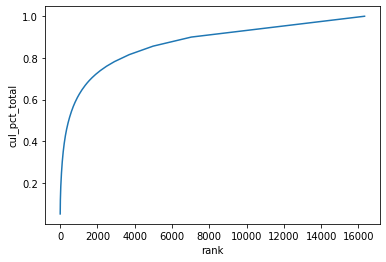

In [27]:
sns.lineplot(x='rank', y='cul_pct_total', data=wcBad);

In [28]:
wcBad[wcBad['rank'] <= 20]['cul_pct_total'].max()

0.1531709623008412

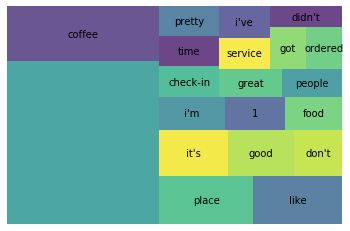

In [29]:
wcBad_top20 = wcBad[wcBad['rank'] <= 20]

squarify.plot(sizes=wcBad_top20['pct_total'], label=wcBad_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [48]:
STOP_WORDS = nlp.Defaults.stop_words.union(['check-in','',' ','  ', "don't", "i've", 'it', "it's", 'it.', 'the', 'this', '-', "i'm", '1'])

In [49]:
tokens = []

for doc in tokenizer.pipe(shopsBad['full_review_text'], batch_size=500):
    
    doc_tokens = []
    
    for token in doc: 
        if token.text.lower() not in STOP_WORDS:
            doc_tokens.append(token.text.lower())
   
    tokens.append(doc_tokens)
    
shopsBad['tokens'] = tokens

tokens2 = []

for doc in tokenizer.pipe(shopsGood['full_review_text'], batch_size=500):
    
    doc_tokens = []
    
    for token in doc: 
        if token.text.lower() not in STOP_WORDS:
            doc_tokens.append(token.text.lower())
   
    tokens2.append(doc_tokens)
    
shopsGood['tokens'] = tokens2

/Users/timothy/miniconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
/Users/timothy/miniconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [50]:
wcBad = count(shopsBad['tokens'])
wcGood = count(shopsGood['tokens'])

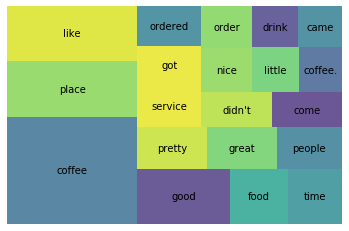

In [51]:
wcBad_top20 = wcBad[wcBad['rank'] <= 20]

squarify.plot(sizes=wcBad_top20['pct_total'], label=wcBad_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

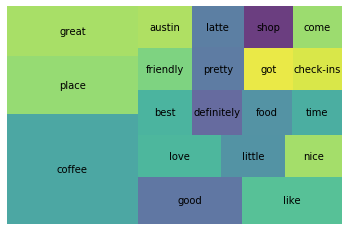

In [52]:
wcGood_top20 = wcGood[wcGood['rank'] <= 20]

squarify.plot(sizes=wcGood_top20['pct_total'], label=wcGood_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [55]:
wcBad.head(100)

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
16,coffee,827,1637,1.0,0.019090,0.019090,0.560298
131,place,597,875,2.0,0.010204,0.029294,0.404472
9,like,548,834,3.0,0.009726,0.039020,0.371274
31,good,441,599,4.0,0.006985,0.046006,0.298780
118,food,266,369,5.0,0.004303,0.050309,0.180217
235,time,264,351,6.0,0.004093,0.054402,0.178862
95,pretty,278,349,7.0,0.004070,0.058472,0.188347
161,great,264,348,8.0,0.004058,0.062531,0.178862
521,people,247,327,9.0,0.003813,0.066344,0.167344
15,service,261,314,10.0,0.003662,0.070006,0.176829


In [56]:
wcGood.head(100)

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
13,coffee,3383,6421,1.0,0.021229,0.021229,0.550977
128,place,2432,3389,2.0,0.011205,0.032434,0.396091
149,great,2174,2902,3.0,0.009595,0.042028,0.354072
354,good,1643,2180,4.0,0.007208,0.049236,0.267590
215,like,1486,2068,5.0,0.006837,0.056073,0.242020
33,love,1263,1604,6.0,0.005303,0.061376,0.205700
606,little,1027,1230,7.0,0.004067,0.065443,0.167264
241,nice,962,1101,8.0,0.003640,0.069083,0.156678
462,best,951,1093,9.0,0.003614,0.072697,0.154886
194,friendly,986,1014,10.0,0.003352,0.076049,0.160586


## Can visualize the words with the greatest difference in counts between 'good' & 'bad'?

Couple Notes: 
- Rel. freq. instead of absolute counts b/c of different numbers of reviews
- Only look at the top 5-10 words with the greatest differences


Bad reviews say more negative words like "can't" and "didn't". Good reviews seem to have nicer exclamatory words and appears to mention staff names quite a bit.

## Stretch Goals

* Analyze another corpus of documents - such as Indeed.com job listings ;).
* Play with the Spacy API to
 - Extract Named Entities
 - Extracting 'noun chunks'
 - Attempt Document Classification with just Spacy
 - *Note:* This [course](https://course.spacy.io/) will be of interesting in helping you with these stretch goals. 
* Try to build a plotly dash app with your text data 

